# DFS

In [3]:
def dfs_iterative(graph, start):
  visited = set()
  stack = [start]

  while stack:
    node = stack.pop()
    if node not in visited:
      visited.add(node)
      print(node, end=" ")
      stack.extend(reversed(graph.get(node, [])))

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

print("\nDFS Iterative Traversal:")
dfs_iterative(graph, 'A')

def dfs_recursive(graph, node, visited=None):
    if visited is None:
        visited = set()  # Initialize visited set

    if node not in visited:
        print(node, end=" ")  # Process the node
        visited.add(node)

        for neighbor in graph.get(node, []):  # Visit all adjacent nodes
            dfs_recursive(graph, neighbor, visited)


print("\nDFS Recursive Traversal:")
dfs_recursive(graph, 'A')


DFS Iterative Traversal:
A B D E F C 
DFS Recursive Traversal:
A B D E F C 

In [ ]:
# DFS using network x

In [4]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F'), ('E', 'F')
]
G.add_edges_from(edges)

# Iterative DFS using NetworkX
def dfs_iterative_nx(graph, start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            print(node, end=" ")
            stack.extend(reversed(list(graph.neighbors(node))))  # Get neighbors

print("\nDFS Iterative Traversal (NetworkX):")
dfs_iterative_nx(G, 'A')

# Recursive DFS using NetworkX
def dfs_recursive_nx(graph, node, visited=None):
    if visited is None:
        visited = set()

    if node not in visited:
        print(node, end=" ")
        visited.add(node)

        for neighbor in graph.neighbors(node):
            dfs_recursive_nx(graph, neighbor, visited)

print("\n\nDFS Recursive Traversal (NetworkX):")
dfs_recursive_nx(G, 'A')



DFS Iterative Traversal (NetworkX):
A B D E F C 

DFS Recursive Traversal (NetworkX):
A B D E F C 

#Activity 1

Current Node: A
Current Node: C
Current Node: G
Current Node: F
Current Node: E
Current Node: D
Explored Nodes: ['A', 'C', 'G', 'F', 'E', 'D']
Solution Path: ['A', 'E', 'D']


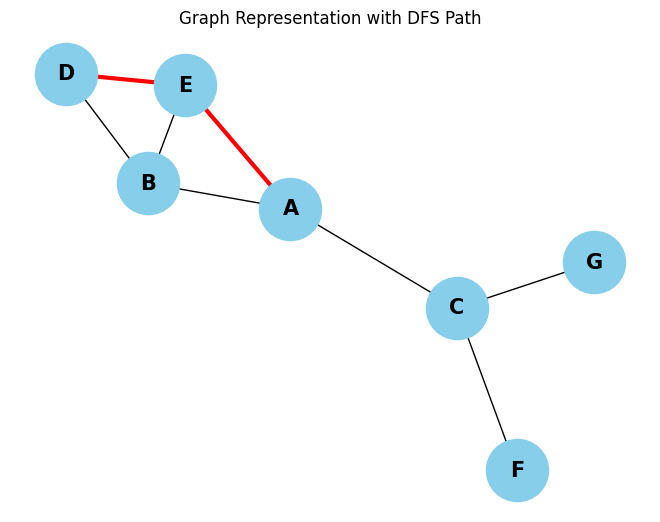

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state, parent, actions, totalCost):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalCost = totalCost

def actionSequence(graph, initialState, goalState):
    solution = [goalState]
    currentParent = graph[goalState].parent
    while currentParent is not None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent
    solution.reverse()
    return solution

def drawGraph(graph, path):
    G = nx.Graph()

    # Add edges to the graph
    for node in graph:
        for neighbor in graph[node].actions:
            G.add_edge(node, neighbor)

    # Positioning of nodes
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_color='black', font_weight='bold')

    # Highlight the solution path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Graph Representation with DFS Path")
    plt.show()

def DFS():
    initialState = "A"
    goalState = "D"
    graph = {
        "A": Node("A", None, ["B", "E", "C"], None),
        "B": Node("B", None, ["D", "E", "A"], None),
        "C": Node("C", None, ["A", "F", "G"], None),
        "D": Node("D", None, ["B", "E"], None),
        "E": Node("E", None, ["A", "B", "D"], None),
        "F": Node("F", None, ["C"], None),
        "G": Node("G", None, ["C"], None),
    }

    frontier = [initialState]
    explored = []

    while len(frontier) != 0:
        currentNode = frontier.pop(-1)
        print("Current Node:", currentNode)
        explored.append(currentNode)

        if currentNode == goalState:
            print("Explored Nodes:", explored)
            solution = actionSequence(graph, initialState, goalState)
            return solution

        for child in graph[currentNode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentNode
                frontier.append(child)

    return None

solution = DFS()
print("Solution Path:", solution)

# Draw the graph with the solution path
drawGraph({
    "A": Node("A", None, ["B", "E", "C"], None),
    "B": Node("B", None, ["D", "E", "A"], None),
    "C": Node("C", None, ["A", "F", "G"], None),
    "D": Node("D", None, ["B", "E"], None),
    "E": Node("E", None, ["A", "B", "D"], None),
    "F": Node("F", None, ["C"], None),
    "G": Node("G", None, ["C"], None),
}, solution)

# Activity 2

Current Node: D
Current Node: E
Current Node: A
Current Node: C
Explored Nodes: ['D', 'E', 'A', 'C']
Solution Path: ['D', 'E', 'A', 'C']


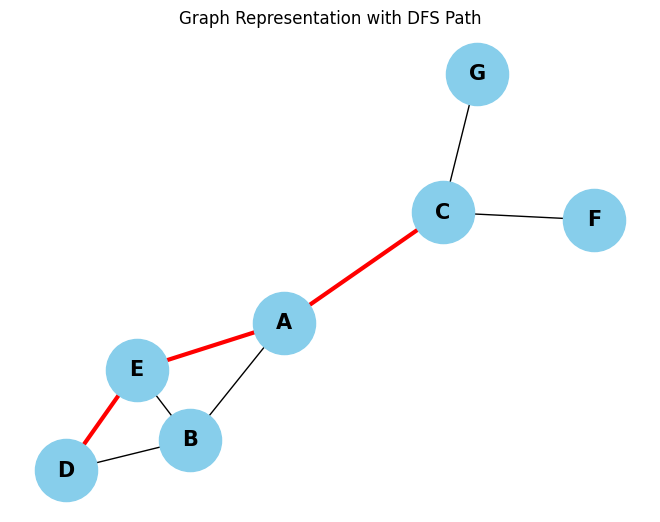

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state, parent, actions, totalCost):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalCost = totalCost

def actionSequence(graph, initialState, goalState):
    solution = [goalState]
    currentParent = graph[goalState].parent
    while currentParent is not None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent
    solution.reverse()
    return solution

def drawGraph(graph, path):
    G = nx.Graph()

    # Add edges to the graph
    for node in graph:
        for neighbor in graph[node].actions:
            G.add_edge(node, neighbor)

    # Positioning of nodes
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_color='black', font_weight='bold')

    # Highlight the solution path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Graph Representation with DFS Path")
    plt.show()

def DFS():
    initialState = "D"
    goalState = "C"
    graph = {
        "A": Node("A", None, ["B", "E", "C"], None),
        "B": Node("B", None, ["D", "E", "A"], None),
        "C": Node("C", None, ["A", "F", "G"], None),
        "D": Node("D", None, ["B", "E"], None),
        "E": Node("E", None, ["A", "B", "D"], None),
        "F": Node("F", None, ["C"], None),
        "G": Node("G", None, ["C"], None),
    }

    frontier = [initialState]
    explored = []

    while len(frontier) != 0:
        currentNode = frontier.pop(-1)
        print("Current Node:", currentNode)
        explored.append(currentNode)

        if currentNode == goalState:
            print("Explored Nodes:", explored)
            solution = actionSequence(graph, initialState, goalState)
            return solution

        for child in graph[currentNode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentNode
                frontier.append(child)

    return None

solution = DFS()
print("Solution Path:", solution)

# Draw the graph with the solution path
drawGraph({
    "A": Node("A", None, ["B", "E", "C"], None),
    "B": Node("B", None, ["D", "E", "A"], None),
    "C": Node("C", None, ["A", "F", "G"], None),
    "D": Node("D", None, ["B", "E"], None),
    "E": Node("E", None, ["A", "B", "D"], None),
    "F": Node("F", None, ["C"], None),
    "G": Node("G", None, ["C"], None),
}, solution)

# Lab task 1

DFS Path: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']
Total Distance: 733


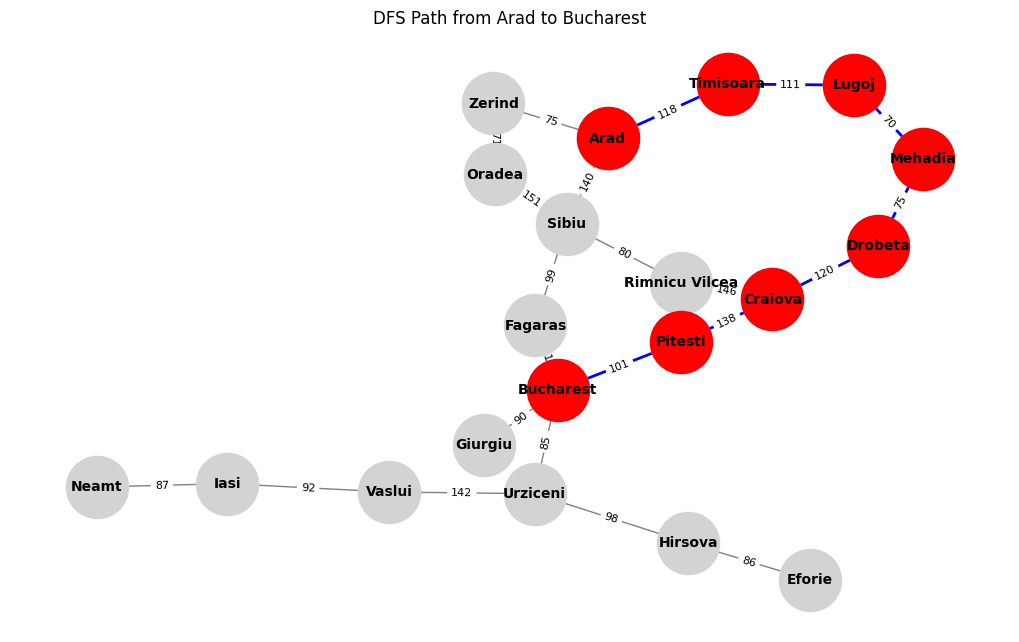

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state, parent=None, cost=0):
        self.state = state
        self.parent = parent
        self.cost = cost  # Total cost from start to this node

def action_sequence(node):
    """Reconstruct the path from the goal to the start."""
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return path[::-1]  # Reverse to get the correct order

def dfs(graph, start, goal):
    """Performs DFS to find a path from start to goal."""
    stack = [Node(start, None, 0)]  # Stack for DFS
    explored = set()

    while stack:
        current = stack.pop()  # DFS uses LIFO
        explored.add(current.state)

        if current.state == goal:
            return action_sequence(current), current.cost

        for neighbor, distance in graph[current.state]:
            if neighbor not in explored:
                stack.append(Node(neighbor, current, current.cost + distance))

    return None, float("inf")  # No path found

# Define the Romania map as an adjacency list
romania_map = {
    "Arad": [("Zerind", 75), ("Sibiu", 140), ("Timisoara", 118)],
    "Zerind": [("Arad", 75), ("Oradea", 71)],
    "Oradea": [("Zerind", 71), ("Sibiu", 151)],
    "Timisoara": [("Arad", 118), ("Lugoj", 111)],
    "Lugoj": [("Timisoara", 111), ("Mehadia", 70)],
    "Mehadia": [("Lugoj", 70), ("Drobeta", 75)],
    "Drobeta": [("Mehadia", 75), ("Craiova", 120)],
    "Craiova": [("Drobeta", 120), ("Rimnicu Vilcea", 146), ("Pitesti", 138)],
    "Sibiu": [("Arad", 140), ("Oradea", 151), ("Fagaras", 99), ("Rimnicu Vilcea", 80)],
    "Fagaras": [("Sibiu", 99), ("Bucharest", 211)],
    "Rimnicu Vilcea": [("Sibiu", 80), ("Craiova", 146), ("Pitesti", 97)],
    "Pitesti": [("Rimnicu Vilcea", 97), ("Craiova", 138), ("Bucharest", 101)],
    "Bucharest": [("Fagaras", 211), ("Pitesti", 101), ("Giurgiu", 90), ("Urziceni", 85)],
    "Giurgiu": [("Bucharest", 90)],
    "Urziceni": [("Bucharest", 85), ("Hirsova", 98), ("Vaslui", 142)],
    "Hirsova": [("Urziceni", 98), ("Eforie", 86)],
    "Eforie": [("Hirsova", 86)],
    "Vaslui": [("Urziceni", 142), ("Iasi", 92)],
    "Iasi": [("Vaslui", 92), ("Neamt", 87)],
    "Neamt": [("Iasi", 87)]
}

# Run DFS from Arad to Bucharest
path, cost = dfs(romania_map, "Arad", "Bucharest")

print("DFS Path:", path)
print("Total Distance:", cost)

# Create a NetworkX graph
G = nx.Graph()

# Add edges to the graph
for city, neighbors in romania_map.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

# Get positions using spring layout
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

# Draw the full graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgray", edge_color="gray", font_size=10, font_weight="bold")

# Highlight the DFS path
path_edges = list(zip(path, path[1:]))  # Convert path to edge pairs
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="red", node_size=2000)  # Mark path nodes in red
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="blue", width=2)  # Mark path edges in blue

# Draw edge labels (distances)
edge_labels = {(city1, city2): f"{weight}" for city1, city2, weight in G.edges(data="weight")}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

plt.title("DFS Path from Arad to Bucharest")
plt.show()

# Lab task 2

In [17]:
def is_valid(x, y, board):
    return 0 <= x < len(board) and 0 <= y < len(board[0])

def dfs(board, word, x, y, index, visited):
    if index == len(word):
        return True

    if not is_valid(x, y, board) or visited[x][y] or board[x][y] != word[index]:
        return False

    # Mark the cell as visited
    visited[x][y] = True

    # All 8 possible directions (N, S, E, W, NE, NW, SE, SW)
    row = [-1, 1, 0, 0, -1, -1, 1, 1]
    col = [0, 0, 1, -1, 1, -1, 1, -1]

    for i in range(8):
        if dfs(board, word, x + row[i], y + col[i], index + 1, visited):
            return True

    # Unmark the cell
    visited[x][y] = False
    return False

def word_exists(board, word):
    rows, cols = len(board), len(board[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            if board[i][j] == word[0] and dfs(board, word, i, j, 0, visited):
                return True
    return False

def find_words(board, dictionary):
    result = []
    for word in dictionary:
        if word_exists(board, word):
            result.append(word)
    return result

# Boggle board
board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

# Dictionary words
dictionary = ["START", "NOTE", "SAND", "STONED"]

# Find valid words
valid_words = find_words(board, dictionary)
print("Valid Words:", valid_words)

Valid Words: ['NOTE', 'SAND', 'STONED']
